# Numerical Optimization (CS215300) Assignment 2
## Introduction
In this assignment, we expect you to be familiar with the Pytorch optimizer library. We are using the Rosenbrock function as the benchmark of our optimization algorithms again. Since this is a simple test on very small scale, CUDA is not needed. You need to install Pytorch to acquire the pre-defined optimizers.  
The library document link: https://pytorch.org/docs/stable/optim.html

## Task
1. Please try different optimizers and observe the behavior of them, and try different hyperparameters and observe if they behave differently. (In case of L-BFGS, the parameters wrapped in this sample code won't work. If you want to try it anyway, you will need to write your own code.)
2. Whether if your setting converges or not, please justify it by experiment or your hyperthesis.
3. PLease answer the following question in your report:  
    (a) What is the relation between SGD and GD(gradient descent) in our case, i.e. when the input is one-dimensional?  
    (b) Have you found effective way to set hyperparameters so they can iterate faster toward the minimum point?
4. Please write a concise report about your experiments and analysis. If you need to plot tables, please check the following link: https://www.tablesgenerator.com/markdown_tables

##  Advanced Technique: Learning rate scheduler
Another technique to find hyperparameter for learning rate is to perform scheduled adjestments of learning rate. This is called 'learning rate scheduler'. The adjestments here not only affected by current learning rate and momentum etc., but also the epoch number or step numbers. Usually, in these kind of method, we are presuming the optimal hyperparameters can be found by recognizing certain patterns, and we schedule the experiments to search the proper parameters in such manner. You can also apply these function in your code. The library document of learning rate scheduler is in the same link above.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [2]:
def rosenbrock(tensor):
    # since pytorch uses tensor, we don't use built-in function here
    x, y = tensor
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def execute_steps(func, initial_state, optimizer_class, optimizer_config, num_iter=500):
    x = torch.Tensor(initial_state).requires_grad_(True)
    optimizer = optimizer_class([x], **optimizer_config)
    steps = []
    steps = np.zeros((2, num_iter))
    steps[:, 0] = np.array(initial_state)
    last_f = torch.tensor([100., 100.])
    for i in range(0, num_iter):
        optimizer.zero_grad()
        f = func(x)
        f.backward(create_graph=True, retain_graph=True)
        torch.nn.utils.clip_grad_norm_(x, 1.0)
        optimizer.step()
        steps[:, i] = x.detach().numpy()
    return steps

def plot_rosenbrok(grad_iter, optimizer_name):
    x = np.linspace(-2, 2, 250)
    y = np.linspace(-1, 3, 250)
    minimum = (1.0, 1.0)

    X, Y = np.meshgrid(x, y)
    Z = rosenbrock([X, Y])

    iter_x, iter_y = grad_iter[0, :], grad_iter[1, :]

    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.contour(X, Y, Z, 90, cmap='jet')
    ax.plot(iter_x, iter_y, color='r', marker='x')

    ax.set_title('{} with {} iterations'.format(optimizer_name, len(iter_x)))
    plt.plot(*minimum, 'gD')
    plt.plot(iter_x[-1], iter_y[-1], 'rD')
    plt.show()

In [3]:
def printX(steps):
    iter_x, iter_y = steps[0, :], steps[1, :]
    i=0
    for x,y in zip(iter_x,iter_y):
        print("iteration %d: [%.4f %.4f]" %(i,x,y))
        i+=1

In [4]:
initial_state = np.array([-2,2])
# Try other optimizers!
optimizer_class = torch.optim.Adam
tol=1e-2
steps = execute_steps(
        rosenbrock,
        initial_state,
        optimizer_class,
        # Try some different hyperparameters! Note that these parameters should be wraped in a dict().
        {'lr':0.01, 'weight_decay':0},
        num_iter=5000,
    )

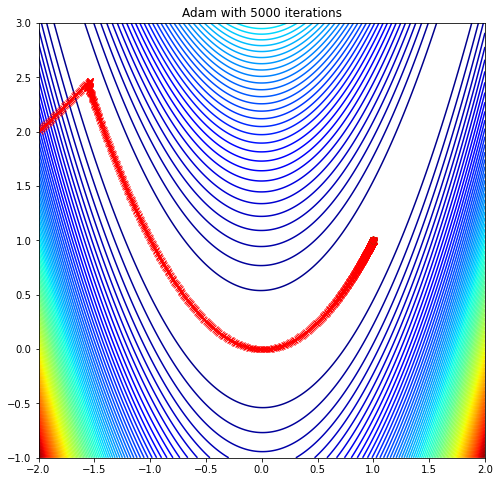

In [5]:
plot_rosenbrok(steps, optimizer_class.__name__)

In [6]:
printX(steps)

iteration 0: [-1.9900 2.0100]
iteration 1: [-1.9800 2.0200]
iteration 2: [-1.9700 2.0300]
iteration 3: [-1.9600 2.0400]
iteration 4: [-1.9500 2.0500]
iteration 5: [-1.9400 2.0600]
iteration 6: [-1.9300 2.0701]
iteration 7: [-1.9200 2.0801]
iteration 8: [-1.9100 2.0901]
iteration 9: [-1.9000 2.1001]
iteration 10: [-1.8900 2.1102]
iteration 11: [-1.8800 2.1203]
iteration 12: [-1.8700 2.1303]
iteration 13: [-1.8600 2.1404]
iteration 14: [-1.8500 2.1505]
iteration 15: [-1.8400 2.1606]
iteration 16: [-1.8300 2.1707]
iteration 17: [-1.8201 2.1808]
iteration 18: [-1.8101 2.1909]
iteration 19: [-1.8001 2.2011]
iteration 20: [-1.7901 2.2113]
iteration 21: [-1.7801 2.2214]
iteration 22: [-1.7701 2.2316]
iteration 23: [-1.7601 2.2419]
iteration 24: [-1.7501 2.2521]
iteration 25: [-1.7402 2.2623]
iteration 26: [-1.7302 2.2726]
iteration 27: [-1.7202 2.2829]
iteration 28: [-1.7102 2.2932]
iteration 29: [-1.7002 2.3035]
iteration 30: [-1.6903 2.3138]
iteration 31: [-1.6803 2.3242]
iteration 32: [-1.

iteration 1952: [1.0009 0.9952]
iteration 1953: [0.9999 0.9961]
iteration 1954: [0.9975 0.9983]
iteration 1955: [0.9969 0.9989]
iteration 1956: [0.9979 0.9980]
iteration 1957: [1.0002 0.9958]
iteration 1958: [1.0009 0.9953]
iteration 1959: [0.9999 0.9961]
iteration 1960: [0.9976 0.9983]
iteration 1961: [0.9969 0.9989]
iteration 1962: [0.9979 0.9980]
iteration 1963: [1.0002 0.9959]
iteration 1964: [1.0009 0.9953]
iteration 1965: [0.9999 0.9962]
iteration 1966: [0.9976 0.9983]
iteration 1967: [0.9970 0.9989]
iteration 1968: [0.9979 0.9980]
iteration 1969: [1.0002 0.9959]
iteration 1970: [1.0009 0.9953]
iteration 1971: [0.9999 0.9962]
iteration 1972: [0.9976 0.9984]
iteration 1973: [0.9970 0.9989]
iteration 1974: [0.9979 0.9981]
iteration 1975: [1.0002 0.9959]
iteration 1976: [1.0009 0.9954]
iteration 1977: [0.9999 0.9962]
iteration 1978: [0.9976 0.9984]
iteration 1979: [0.9970 0.9989]
iteration 1980: [0.9979 0.9981]
iteration 1981: [1.0002 0.9959]
iteration 1982: [1.0009 0.9954]
iteratio

iteration 3224: [0.9999 0.9999]
iteration 3225: [0.9999 0.9999]
iteration 3226: [0.9999 0.9999]
iteration 3227: [0.9999 0.9999]
iteration 3228: [0.9999 0.9999]
iteration 3229: [0.9999 0.9999]
iteration 3230: [0.9999 0.9999]
iteration 3231: [0.9999 0.9999]
iteration 3232: [0.9999 0.9999]
iteration 3233: [0.9999 0.9999]
iteration 3234: [0.9999 0.9999]
iteration 3235: [0.9999 0.9999]
iteration 3236: [0.9999 0.9999]
iteration 3237: [0.9999 0.9999]
iteration 3238: [0.9999 0.9999]
iteration 3239: [0.9999 0.9999]
iteration 3240: [0.9999 0.9999]
iteration 3241: [0.9999 0.9999]
iteration 3242: [1.0000 0.9999]
iteration 3243: [1.0000 0.9999]
iteration 3244: [1.0000 0.9999]
iteration 3245: [1.0000 0.9999]
iteration 3246: [1.0000 0.9999]
iteration 3247: [1.0000 0.9999]
iteration 3248: [1.0000 0.9999]
iteration 3249: [1.0000 0.9999]
iteration 3250: [1.0000 0.9999]
iteration 3251: [1.0000 0.9999]
iteration 3252: [1.0000 0.9999]
iteration 3253: [1.0000 0.9999]
iteration 3254: [1.0000 0.9999]
iteratio

## Report

Most of the optimizers are not able to converge to minimum point for rosenbrock function. The function is unimodal, and the global minimum lies in a narrow, parabolic valley. However, even though this valley is easy to find, convergence to the minimum is difficult
For this reason, most of optimzers failed to find exact minimum.
Based on my experiments, I firstly set learning rate to the relatively large number (for example lr=1) and usually in the most cases we can see that optimizers will have huge jumps and cannot detect minimum point. The remedy of this issue is to decrease learning rate or add momentum or weight decay (depends on dict of optimizers).
For example, in Adam optiizer, chossing large learning rate is not good idea to find minimizer (although the result is very near to minimum point). Since minimum points of rosenbrock function in prabolic valley, at the last steps of the optimizer, it is not able to converge.
After, I tried to choose small learning rate (lr=0.01) for Adam optimzier and fortunaley it converge to minimum points after 1148 iterations.

Another candidate optimizer which was used by me is SGD with momentum and without momentum. Again, first I choose large learning rate (lr=1) and it is totally wrong choice due to results.
Again, I started to decrease the learning rate and it seems it would be better but again, it didn't find minimum points accurately.
In SGD dict, we are able to use momentum. So,  I add some momentum to the optimizer, although it got better, again we are not able to find minimizer accurately.
Suprisingly, Nesterov momentum did a great job with lr=0.001. It converged to minimum after 1879 iterations.

All results of the optimizer (including hyperparameters and results) are following by:
    

**"Adam Optimizer":**
    
lr: 0.01      weight_decay:0          >> Converge (Iteration 1148)
        
lr: 0.02      weight_decay:0          >> Not Converge but near the minimum points
        
lr: 0.02      weight_decay: 0.001     >> Not Converge but near the minimum points
        
lr: 0.05      weight_decay:0          >> Not Converge but near the minimum points
        
lr: 0.05      weight_decay: 0.001     >> Not Converge but near the minimum points
        
lr: 0.1       weight_decay: 0         >> Not Converge but near the minimum points
        
lr: 0.1       weight_decay: 0.01      >> Not Converge but near the minimum points

       
    
**"Stochastic Gradient Descent with/without momentum":**
    
lr: 0.1      momentum: 0   >> Not Converge after 25000 Iterations!
        
lr: 1        momentum: 0   >> Not Converge due to large learning rate
        
lr: 0.01     momentum: 0.9 >> Not converge after 5000 iterations but it's near to optimal solution
        
lr: 0.01     momentum: 0   >> Not converge after 5000 iterations but it's near to optimal solution
        
lr:0.01      momentum: 0.9   dampening: 0, nesterov:True >> Not converge after 5000 iterations but it's near to optimal solution
                
lr:0.001     momentum: 0.99  dampening: 0, nesterov:True >> converge after 1879 iteration
                
lr: 0.02     momentum: 0.9   dampening: 0, nesterov:True >> Not Converge but near the minimum points

                

**"RMSProp":**
    
lr: 0.001, alpha:0.99,    weight_decay: 0.01, momentum:0.9  >> Not Converge but near the minimum points
                
lr: 0.01,  alpha: 0.99,   weight_decay: 0,    momentum:0.99 >> Not Converge but near the minimum points
                
lr: 0.01,  alpha: 0.99,   weight_decay: 0,    momentum:0    >> Not Converge but near the minimum points
                
lr: 0.01,  alpha: 0,      weight_decay: 0,    momentum: 0,  >> Too bad!
                
lr: 0.01,  alpha: 0.99,   weight_decay: 0.9,  momentum: 0   >> Not Converge but near the minimum points
                
lr: 0.01,  alpha: 0.99,   weight_decay: 0.01, momentum: 0   >> Not Converge but near the minimum points
                
lr: 0.01,  alpha: 0.99,   weight_decay: 0.99, momentum: 0   >> Not Converge but near the minimum points


                
**"Adagrad":**
    
lr: 0.01, lr_decay: 0,      weight_decay: 0       >> not converge
            
lr: 0.1,  lr_decay: 0,      weight_decay: 0       >> Not Converge but near the minimum points
            
lr: 0.1,  lr_decay: 0,      weight_decay: 0.01    >> Not Converge but near the minimum points
            
lr: 0.5,  lr_decay: 0.001,  weight_decay: 0,      >> Not Converge but near the minimum points
            
lr: 0.5,  lr_decay: 0.01,   weight_decay: 0.9,    >> not converge
            
lr: 0.5,  lr_decay: 0.01,   weight_decay: 0.01,   >> Not Converge but near the minimum points
            
lr: 0.5,  lr_decay: 0.001,  weight_decay: 0.9,    >> not converge
            
lr: 0.5,  lr_decay: 0.001,  weight_decay: 0.01,   >> Not Converge but near the minimum points
            
lr: 1,    lr_decay: 0.01,   weight_decay: 0,      >> Not Converge but near the minimum points
            
lr: 1,    lr_decay: 0.01,   weight_decay: 0.01    >> Not Converge but near the minimum points

    
    
**"AdamW":**
    
lr: 0.001, betas: (0.9, 0.999), weight_decay:0.01 >> Not Converge but near the minimum points
            
lr: 0.01,  betas: (0.9, 0.999), weight_decay:0.01 >> Not Converge but near the minimum points
            
lr: 0.1,   betas: (0.9, 0.999), weight_decay:0.01 >> Not Converge but near the minimum points
            
lr: 0.01,  betas: (0.9, 0.999), weight_decay:0.05 >> Not Converge but near the minimum points
            
lr: 0.1,   betas: (0.9, 0.999), weight_decay:0.05 >> Not Converge but near the minimum points

        
        
**"Adadelta":**


lr: 0.01, rho: 0.9,   weight_decay: 0,    >> not converge (low learning rate)
            
lr: 0.1,  rho: 0.9,   weight_decay: 0,    >> Not Converge but near the minimum points
            
lr: 1,    rho: 0.9,   weight_decay: 0,    >> Not Converge but near the minimum points
            
lr: 1,    rho: 0.95,  weight_decay: 0,    >> Not Converge but near the minimum points
            
lr: 1,    rho: 0.99,  weight_decay: 0.01, >> not converge
            
lr: 0.1,  rho: 0.99,  weight_decay: 0,    >> Not Converge but near the minimum points

            
            
**"Rule of thumbs for choosing learning rate:"**
    
mutiple ways existed to select a good starting point for the learning rate. A conventional approach is to try a few different values and see which one gives you the best loss without sacrificing speed of training. We might start with a large value like 0.1, then try exponentially lower values: 0.01, 0.001, etc.
Another technique that can help the network out of local minima is the use of a momentum term (in some optimizers).


**"Momentum role:"**

Momentum simply adds a fraction of the previous weight update to the current one. When the gradient keeps pointing in the same direction, this will increase the size of the steps taken towards the minimum. It is otherefore often necessary to reduce the global learning rate µ when using a lot of momentum (m close to 1). If you combine a high learning rate with a lot of momentum, you will rush past the minimum with huge steps!
When the gradient keeps changing direction, momentum will smooth out the variations. This is particularly useful when the network is not well-conditioned. In such cases the error surface has substantially different curvature along different directions, leading to the formation of long narrow valleys. For most points on the surface, the gradient does not point towards the minimum, and successive steps of gradient descent can oscillate from one side to the other, progressing only very slowly to the minimum. The addition of momentum helps to speed up convergence to the minimum by damping these oscillations.


**"Weight Decay role:"**

For weight_decay, By trial and error and by varying the decay rate in multiples rather than in increments (e.g.: try 0.1, 0.03, 0.01, 0.003, 0.001, and so forth). Higher values means a stronger regularization effect.


**"Adadelta and RMSprops (Optimizers for improving Adagrad)"**

First adaptive learning rate that aims to improve AdaGrad is root mean square prop, or RMSprop. We take the exponential moving average of these gradients rather than the cumulative sum of squared gradients like AdaGrad does. Similar to momentum, we'll see this update become the usual update for most optimizers' learning rate component over time.

Adadelta, like RMSprop, is an enhancement on AdaGrad that focuses on the learning rate component. Adadelta is most likely short for 'adaptive delta,' with delta referring to the difference between the current and freshly updated weights.
The distinction between Adadelta and RMSprop is that Adadelta replaces the learning rate parameter with an exponential moving average of squared deltas, whereas RMSprop uses the learning rate parameter.


**"Comparing Adam (or any adaptive-based method) with SGD:"**

SGD-based optimizers have the disadvantage of requiring scalar and uniform gradient learning in all directions (i.e., for all the parameters for which gradient is to be updated). Adaptive learning algorithms like Adam, on the other hand, use estimates of the function's curvature to scale the gradient. Instead of using a single learning rate for all parameters, Adam utilizes a vector of learning rates, one for each parameter, which he modifies as the training advances.


**"Relation between SGD and GD:"**

About difference of SGD and GD (which was asked by TA), I can say that in GD we had fixed learning rate (also we have another thing for example steepest gradient descent which learning rate is changable during optimization process) and also we don't have momentum or adaptive learning rate in naive GD. However, in SGD, we are able to use momentum or nesterov momentum. Another difference between them is that SGD usually faster since it won't need all samples. In other words, n Gradient Descent, we consider all the points in calculating loss and derivative, while in Stochastic gradient descent, we use single point in loss function and its derivative randomly.
For our case, GD and SGD are identical when we don't use momentum for SGD and sample size = 1 